In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL and Alchemy ORM
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [7]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [8]:
# Make an inspector 
inspector = inspect(engine)

In [9]:
# Need to get table names
inspector.get_table_names()

['measurement', 'station']

In [10]:
# Write a query to bring back the "measurement" db
query1 = """
        SELECT 
        *
        FROM 
        measurement
        """
conn = engine.connect()

measurement = pd.read_sql(query1, conn)
measurement

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [11]:
# Explore database (info/describe)
measurement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       19550 non-null  int64  
 1   station  19550 non-null  object 
 2   date     19550 non-null  object 
 3   prcp     18103 non-null  float64
 4   tobs     19550 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 763.8+ KB


In [12]:
measurement.describe()

,id,prcp,tobs
count,19550.000000,18103.000000,19550.000000
mean,9775.500000,0.160644,73.097954
std,5643.743217,0.468746,4.523527
min,1.000000,0.000000,53.000000
25%,4888.250000,0.000000,70.000000
50%,9775.500000,0.010000,73.000000
75%,14662.750000,0.110000,76.000000
max,19550.000000,11.530000,87.000000


In [13]:
# Write another query for the "station"
query2 =            """
            SELECT 
            *
            FROM
            station
            """
# bring back dataframe
station = pd.read_sql(query2,conn)
station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [14]:
# Explore "station"
station.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         9 non-null      int64  
 1   station    9 non-null      object 
 2   name       9 non-null      object 
 3   latitude   9 non-null      float64
 4   longitude  9 non-null      float64
 5   elevation  9 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 560.0+ bytes


In [15]:
station.describe()


,id,latitude,longitude,elevation
count,9.000000,9.000000,9.000000,9.000000
mean,5.000000,21.393826,-157.867098,60.977778
std,2.738613,0.086442,0.103873,103.465547
min,1.000000,21.271600,-158.011100,0.900000
25%,3.000000,21.333100,-157.975100,7.000000
50%,5.000000,21.393400,-157.837400,14.600000
75%,7.000000,21.451670,-157.802500,32.900000
max,9.000000,21.521300,-157.711390,306.600000


# Exploratory Climate Analysis

In [16]:
# Find the last date (max)
measurement.date.max()


'2017-08-23'

In [17]:
# Go a year back and define it in a variable
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
last_year

datetime.date(2016, 8, 23)

In [18]:
# Query for last twelve months of precipitation data 
query3 = """
            SELECT 
                date,
                prcp
            FROM
                measurement
            WHERE
                date > '2016-08-23'
            """
 

In [19]:
# Sort by date
months =  pd.read_sql(query3, conn).sort_values('date')

In [20]:
months.head()


,date,prcp
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15


In [21]:
months.tail()

,date,prcp
1522,2017-08-22,0.00
1523,2017-08-23,0.08
359,2017-08-23,0.00
1005,2017-08-23,0.00
2222,2017-08-23,0.45


In [22]:
months["Date"] = pd.to_datetime(months.date)
months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 0 to 2222
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2223 non-null   object        
 1   prcp    2015 non-null   float64       
 2   Date    2223 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 69.5+ KB


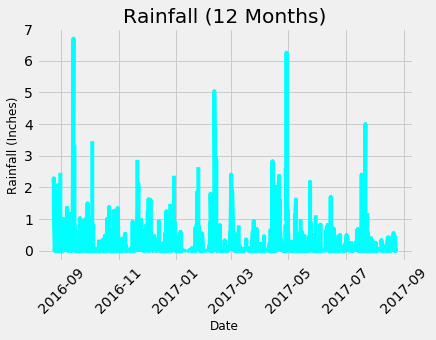

<Figure size 432x288 with 0 Axes>

In [23]:
# Plot a graph using Dataframe plot method (date and prcp)

plt.plot(months.Date, months.prcp, color = "aqua")
plt.xticks(rotation = 45)
plt.title("Rainfall (12 Months)")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Rainfall (Inches)", fontsize=12)
plt.figure()
plt.show()


In [24]:
# Summarize the prcp data using Pandas
months.prcp.describe()


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [25]:
# Sort by station in first dataframe 
measurement.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [26]:
measurement.groupby('station').size().sort_values()

station
USC00518838     511
USC00517948    1372
USC00511918    1979
USC00514830    2202
USC00516128    2612
USC00519523    2669
USC00513117    2709
USC00519397    2724
USC00519281    2772
dtype: int64

In [27]:
# Query for total number of stations in data 

query_station = """
            SELECT 
                COUNT(station)
            FROM 
                station
            """
count = pd.read_sql(query_station, conn)
count

,COUNT(station)
0,9


In [28]:
# Find the most active stations in the dataset using "measurement" df
measurement.station.value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [29]:
# Order the stations in descending order through a query 
query5 = """
            SELECT
                station, 
                COUNT(station) Activity
            FROM 
                measurement
            GROUP BY 
                station
            ORDER BY 
                Activity DESC
            """

station_desc = pd.read_sql(query5, conn)
station_desc


,station,Activity
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [30]:

query4 = """
            SELECT 
                *
            FROM
                measurement
            WHERE 
                station = 'USC00519281' AND
                date > '2016-08-23'
            """

In [31]:
station  = pd.read_sql(query4, conn)
station.head()

,id,station,date,prcp,tobs
0,14609,USC00519281,2016-08-24,2.15,77.0
1,14610,USC00519281,2016-08-25,0.06,80.0
2,14611,USC00519281,2016-08-26,0.01,80.0
3,14612,USC00519281,2016-08-27,0.12,75.0
4,14613,USC00519281,2016-08-28,0.60,73.0


In [32]:
len(station)

351

In [33]:
# Whats the square root of 351??

In [34]:
np.sqrt(351)

18.734993995195193

In [35]:
# Use station that has the most temperature observations

In [36]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp = """
            SELECT 
                date,
                tobs as Temperature
            FROM 
                measurement
            WHERE 
                station = 'USC00519281' AND 
                date > DATE('2017-08-23', '-12 months')
            """
station_temp = pd.read_sql(station_temp, conn)
station_temp

,date,Temperature
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


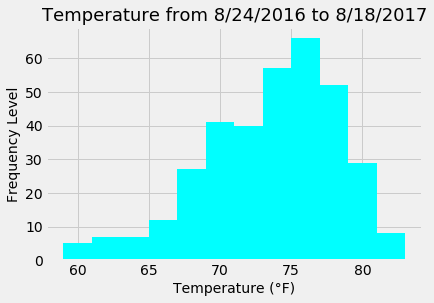

In [37]:
# Plot a histogram of the results of the upper cell
plt.hist(station_temp.Temperature, bins = 12, color="aqua")
plt.title('Temperature from 8/24/2016 to 8/18/2017', fontsize= 18)
plt.xlabel('Temperature (°F)', fontsize=14)
plt.ylabel('Frequency Level', fontsize=14)
plt.show()